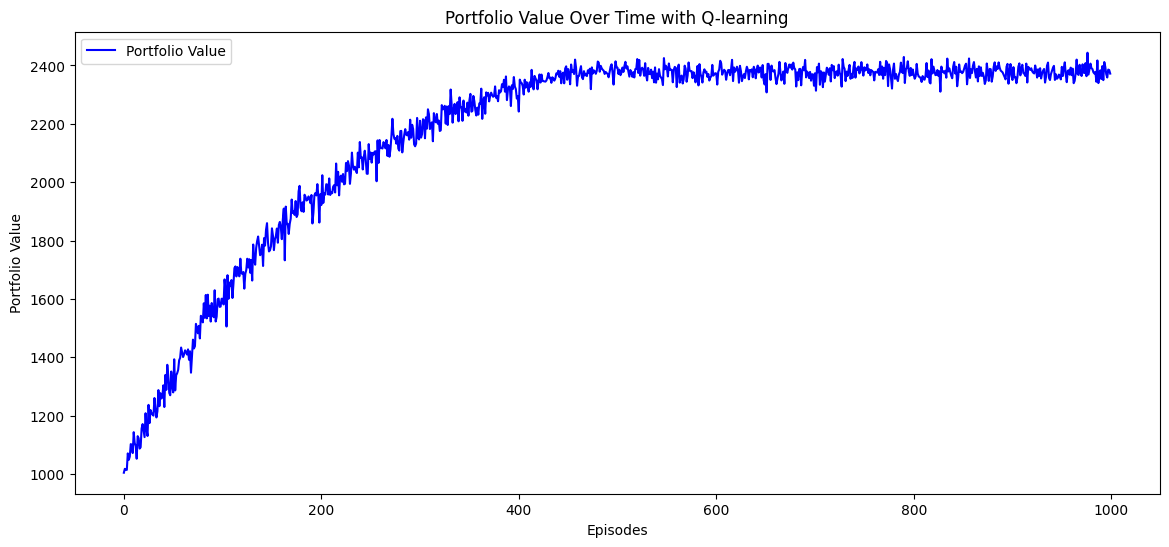

In [1]:
def Quant1():
    import numpy as np
    import matplotlib.pyplot as plt

    # Set the random seed for reproducibility
    np.random.seed(42)

    # Parameters
    T = 1.0                 # Time horizon (1 year)
    dt = 0.001              # Time step
    n_steps = int(T / dt)   # Number of time steps
    S0 = 100.0              # Initial asset price
    mu = 0.05               # Drift of the asset price
    V1_0, V2_0 = 0.04, 0.04 # Initial variances (volatility factors)
    kappa1, theta1, sigma1 = 1.5, 0.04, 0.3  # Parameters for factor 1
    kappa2, theta2, sigma2 = 1.0, 0.04, 0.2  # Parameters for factor 2
    rho = 0.5               # Correlation between the two Brownian motions

    # Pre-allocate arrays
    S = np.zeros(n_steps)
    V1 = np.zeros(n_steps)
    V2 = np.zeros(n_steps)

    # Initialize values
    S[0] = S0
    V1[0] = V1_0
    V2[0] = V2_0

    # Correlation matrix for the Brownian motions
    cov_matrix = np.array([[1.0, rho], [rho, 1.0]])

    # Simulate the paths
    for t in range(1, n_steps):
        # Generate correlated random terms
        Z = np.random.multivariate_normal([0, 0], cov_matrix)
        dW1, dW2 = Z * np.sqrt(dt)

        # Update variance processes (stochastic volatility)
        V1[t] = V1[t - 1] + kappa1 * (theta1 - V1[t - 1]) * dt + sigma1 * np.sqrt(V1[t - 1]) * dW1
        V2[t] = V2[t - 1] + kappa2 * (theta2 - V2[t - 1]) * dt + sigma2 * np.sqrt(V2[t - 1]) * dW2

        # Update asset price process with combined volatility from both factors
        total_volatility = np.sqrt(V1[t] + V2[t])
        S[t] = S[t - 1] * (1 + mu * dt + total_volatility * np.sqrt(dt) * np.random.normal())

    # Plotting the results
    time_grid = np.linspace(0, T, n_steps)

    # Plot asset price
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time_grid, S, label="Asset Price", color="blue")
    plt.xlabel("Time")
    plt.ylabel("Asset Price")
    plt.title("Simulated Asset Price under Multi-Factor Stochastic Volatility Model")
    plt.legend()

    # Plot volatility factors
    plt.subplot(2, 1, 2)
    plt.plot(time_grid, V1, label="Volatility Factor 1", color="orange")
    plt.plot(time_grid, V2, label="Volatility Factor 2", color="green")
    plt.xlabel("Time")
    plt.ylabel("Volatility Factors")
    plt.title("Volatility Factors")
    plt.legend()

    plt.tight_layout()
    plt.show()


def Quant2():
    import numpy as np
    import matplotlib.pyplot as plt

    # Parameters
    T = 1.0                 # Time horizon (1 year)
    dt = 0.01               # Time step
    n_steps = int(T / dt)   # Number of time steps
    F0 = 100.0              # Initial forward price
    alpha0 = 0.2            # Initial volatility
    beta = 0.5              # Elasticity parameter (0 <= beta <= 1)
    rho = -0.3              # Correlation between price and volatility
    nu = 0.3                # Volatility of volatility

    # Pre-allocate arrays
    F = np.zeros(n_steps)
    alpha = np.zeros(n_steps)

    # Initialize values
    F[0] = F0
    alpha[0] = alpha0

    # Correlation matrix
    cov_matrix = np.array([[1.0, rho], [rho, 1.0]])

    # Simulate paths
    for t in range(1, n_steps):
        # Generate correlated random terms
        Z = np.random.multivariate_normal([0, 0], cov_matrix)
        dW1, dW2 = Z * np.sqrt(dt)

        # Update stochastic volatility
        alpha[t] = alpha[t - 1] * np.exp(nu * dW2 - 0.5 * nu**2 * dt)

        # Update forward price with SABR dynamics
        F[t] = F[t - 1] + alpha[t - 1] * F[t - 1]**beta * dW1

    # Plotting the results
    time_grid = np.linspace(0, T, n_steps)

    # Plot forward price
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time_grid, F, label="Forward Price", color="blue")
    plt.xlabel("Time")
    plt.ylabel("Forward Price")
    plt.title("Simulated Forward Price under SABR Model")
    plt.legend()

    # Plot stochastic volatility
    plt.subplot(2, 1, 2)
    plt.plot(time_grid, alpha, label="Stochastic Volatility (Alpha)", color="red")
    plt.xlabel("Time")
    plt.ylabel("Volatility")
    plt.title("Stochastic Volatility")
    plt.legend()

    plt.tight_layout()
    plt.show()


def Quant3():
    import numpy as np
    import pandas as pd
    import torch
    import torch.nn as nn
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import MinMaxScaler

    # Generate synthetic data (replace this with your historical stock prices)
    np.random.seed(42)
    time_steps = 200
    data = np.sin(np.linspace(0, 10, time_steps)) + 0.1 * np.random.normal(size=time_steps)

    # Preprocess data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data.reshape(-1, 1)).astype(np.float32)

    # Prepare data for LSTM
    sequence_length = 20  # Number of previous time steps to use for prediction
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)

    # Convert to PyTorch tensors
    X = torch.from_numpy(X).view(-1, sequence_length, 1)  # (samples, time steps, features)
    y = torch.from_numpy(y).view(-1, 1)  # (samples, output)

    # Define the LSTM model
    class LSTMModel(nn.Module):
        def __init__(self):
            super(LSTMModel, self).__init__()
            self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=2, batch_first=True, dropout=0.2)
            self.fc1 = nn.Linear(50, 25)
            self.fc2 = nn.Linear(25, 1)

        def forward(self, x):
            out, _ = self.lstm(x)
            out = out[:, -1, :]  # Get the output from the last time step
            out = self.fc1(out)
            out = self.fc2(out)
            return out

    # Instantiate the model
    model = LSTMModel()
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Make predictions
    model.eval()
    with torch.no_grad():
        predictions = model(X)
        predictions = scaler.inverse_transform(predictions.numpy())

    # Plot results
    time_grid = np.arange(len(data))
    plt.figure(figsize=(14, 6))
    plt.plot(time_grid[sequence_length:], predictions, label="LSTM Prediction", color="red")
    plt.plot(time_grid, scaler.inverse_transform(data), label="Actual Data", color="blue")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("LSTM Model - Stock Price Prediction")
    plt.legend()
    plt.show()


def Quant4():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression

    # Generate synthetic data for three assets influenced by two common factors
    np.random.seed(42)
    n_samples = 100
    n_assets = 3
    n_factors = 2

    # Generate common factors
    F = np.random.randn(n_samples, n_factors)

    # Generate loadings
    loadings = np.array([[0.8, 0.1], [0.2, 0.7], [0.4, 0.5]])

    # Generate asset returns with noise
    epsilon = np.random.randn(n_samples, n_assets) * 0.1
    Y = F @ loadings.T + epsilon

    # Convert to DataFrame for easier manipulation
    data = pd.DataFrame(Y, columns=[f'Asset_{i+1}' for i in range(n_assets)])

    # Step 1: Factor Extraction using PCA
    pca = PCA(n_components=n_factors)
    pca.fit(data)
    factors_extracted = pca.transform(data)

    # Step 2: Fit a Linear Regression Model to understand the relationship
    model = LinearRegression()
    model.fit(factors_extracted, data)

    # Step 3: Make predictions and plot results
    predictions = model.predict(factors_extracted)

    plt.figure(figsize=(14, 6))
    for i in range(n_assets):
        plt.plot(data.iloc[:, i], label=f'Actual Asset {i+1}', alpha=0.7)
        plt.plot(predictions[:, i], label=f'Predicted Asset {i+1}', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.title('Dynamic Factor Model: Asset Returns Prediction')
    plt.legend()
    plt.show()

def Quant5():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import statsmodels.api as sm

    # Generate synthetic data for a two-regime process
    np.random.seed(42)
    n_samples = 1000
    regime1_mean = 0.01
    regime1_std = 0.02
    regime2_mean = 0.03
    regime2_std = 0.05

    # Simulate regime switches
    regimes = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # 70% in regime 1, 30% in regime 2
    data = np.where(regimes == 0,
                    np.random.normal(regime1_mean, regime1_std, size=n_samples),
                    np.random.normal(regime2_mean, regime2_std, size=n_samples))

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Returns'])

    # Step 1: Fit a Markov Switching Model
    # The '0' means we have a two-regime model
    msm = sm.tsa.MarkovRegression(df['Returns'], k_regimes=2, trend='c', switching_variance=True)
    msm_fit = msm.fit()

    # Step 2: Print the results
    print(msm_fit.summary())

    # Step 3: Plot the results
    # Extract the smoothed probabilities of the regimes
    smoothed_probs = msm_fit.smoothed_marginal_probabilities

    plt.figure(figsize=(14, 6))
    plt.plot(df['Returns'], label='Synthetic Returns', alpha=0.5)
    plt.plot(smoothed_probs[0], label='Probability of Regime 1', color='blue')
    plt.plot(smoothed_probs[1], label='Probability of Regime 2', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.title('Markov Switching Model - Regime Probabilities')
    plt.legend()
    plt.show()


def Quant6():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

    # Generate synthetic financial time series data (e.g., asset returns)
    np.random.seed(42)
    n_samples = 100
    X = np.linspace(0, 10, n_samples).reshape(-1, 1)
    y = np.sin(X).ravel() + np.random.normal(0, 0.1, n_samples)  # Sinusoidal pattern with noise

    # Step 1: Define the kernel and the Gaussian Process model
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

    # Step 2: Fit the Gaussian Process model
    gp.fit(X, y)

    # Step 3: Make predictions
    X_pred = np.linspace(0, 10, 200).reshape(-1, 1)
    y_pred, sigma = gp.predict(X_pred, return_std=True)

    # Step 4: Plot the results
    plt.figure(figsize=(14, 6))
    plt.plot(X, y, 'r.', markersize=10, label='Observations')
    plt.plot(X_pred, y_pred, 'b-', label='GP Prediction')
    plt.fill_between(X_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma,
                     alpha=0.2, color='blue', label='95% Confidence Interval')
    plt.title('Gaussian Process Regression - Asset Returns Prediction')
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()


def Quant7():
    import numpy as np
    import matplotlib.pyplot as plt

    class SimpleNN:
        def __init__(self, input_size, hidden_size, output_size):
            # Initialize weights and biases
            self.W1 = np.random.randn(input_size, hidden_size) * 0.01
            self.b1 = np.zeros((1, hidden_size))
            self.W2 = np.random.randn(hidden_size, output_size) * 0.01
            self.b2 = np.zeros((1, output_size))

        def forward(self, x):
            # Forward pass
            self.z1 = np.dot(x, self.W1) + self.b1
            self.a1 = np.maximum(0, self.z1)  # ReLU activation
            self.z2 = np.dot(self.a1, self.W2) + self.b2
            return self.z2  # Output Q-values

        def backward(self, x, y, learning_rate):
            # Backward pass and weight update
            m = y.shape[0]
            d_loss = self.z2 - y  # Gradient of loss
            d_W2 = np.dot(self.a1.T, d_loss) / m
            d_b2 = np.sum(d_loss, axis=0, keepdims=True) / m
            d_a1 = np.dot(d_loss, self.W2.T)
            d_z1 = d_a1 * (self.a1 > 0)  # Gradient of ReLU

            d_W1 = np.dot(x.T, d_z1) / m
            d_b1 = np.sum(d_z1, axis=0, keepdims=True) / m

            # Update weights
            self.W1 -= learning_rate * d_W1
            self.b1 -= learning_rate * d_b1
            self.W2 -= learning_rate * d_W2
            self.b2 -= learning_rate * d_b2

    class PortfolioEnv:
        def __init__(self, prices):
            self.prices = prices
            self.current_step = 0
            self.initial_balance = 1000
            self.balance = self.initial_balance
            self.portfolio = np.zeros(prices.shape[1])

        def reset(self):
            self.current_step = 0
            self.balance = self.initial_balance
            self.portfolio = np.zeros(self.prices.shape[1])
            return self.prices[self.current_step]

        def step(self, action):
            # Action is a vector of weights for each asset
            action = np.clip(action, -1, 1)
            self.portfolio += action
            self.portfolio = np.clip(self.portfolio, 0, None)  # No short selling

            # Store the current balance before moving to the next step
            previous_balance = self.balance
            self.current_step += 1

            if self.current_step >= len(self.prices):
                # If the current step is beyond the last available price, return the last state and reward
                done = True
                reward = self.balance + np.sum(self.portfolio * self.prices[-1]) - self.initial_balance
                return self.prices[-1], reward, done  # Return the last price, reward, and done
            else:
                # Otherwise, continue as normal
                done = False
                self.balance += np.sum(self.portfolio * (self.prices[self.current_step] - self.prices[self.current_step - 1]))
                reward = self.balance - previous_balance  # Calculate the reward based on the change in balance
                return self.prices[self.current_step], reward, done

    # Generate synthetic price data for three assets
    np.random.seed(42)
    n_samples = 500
    n_assets = 3
    returns = np.random.normal(0, 0.01, (n_samples, n_assets))
    # Create the environment
    prices = np.exp(returns)
    env = PortfolioEnv(prices)

    # Initialize neural network and parameters
    input_size = n_assets
    hidden_size = 10
    output_size = n_assets
    nn = SimpleNN(input_size, hidden_size, output_size)

    # Hyperparameters
    learning_rate = 0.01
    gamma = 0.99
    epsilon = 1.0  # Exploration rate
    epsilon_decay = 0.995
    min_epsilon = 0.1
    n_episodes = 1000

    # Training loop
    portfolio_values = []
    for episode in range(n_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.uniform(-1, 1, size=n_assets)  # Explore
            else:
                q_values = nn.forward(state.reshape(1, -1))
                action = np.clip(q_values[0], -1, 1)  # Exploit, but stay within the action bounds

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Prepare training data
            target_q_values = nn.forward(state.reshape(1, -1))
            # Use next state to update the Q-values
            target_q_values[0] = reward + gamma * np.max(nn.forward(next_state.reshape(1, -1)))

            # Train the neural network
            nn.backward(state.reshape(1, -1), target_q_values, learning_rate)
            state = next_state

        portfolio_values.append(env.balance + np.sum(env.portfolio * prices[env.current_step - 1]))

        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Plot the portfolio value over time
    plt.figure(figsize=(14, 6))
    plt.plot(portfolio_values, label='Portfolio Value', color='blue')
    plt.title('Portfolio Value Over Time with Q-learning')
    plt.xlabel('Episodes')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()


Quant7()